In [1]:
# Install R essentials
!apt-get install r-base
# Install the IR kernel to use R in Colab
!pip install rpy2


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
%load_ext rpy2.ipython


In [5]:
%%R
# Install the required libraries
install.packages("ggplot2")  # For plotting
install.packages("dplyr")    # For data manipulation


(as ‘lib’ is unspecified)







	‘/tmp/RtmpA4ffr0/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpA4ffr0/downloaded_packages’



In [8]:
%%R
# Load the required libraries
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




In [15]:
%%R
# Load the dataset from the file path
crime_data <- read.csv("/content/2010.csv")
# Preview the first few rows of the dataset
head(crime_data)


        ID Case.Number                   Date                  Block IUCR
1 11039140    JA371686 01/01/2010 12:00:00 AM   055XX W FARRAGUT AVE 1753
2 10342825    HY533211 01/01/2010 12:00:00 AM   056XX W EASTWOOD AVE 1752
3 10938629    JA251783 01/01/2010 12:00:00 AM 043XX N MONTICELLO AVE 1753
4 11262896    JB194570 01/01/2010 12:00:00 AM    057XX N ROCKWELL ST 0266
5 11875312    JC490052 01/01/2010 12:00:00 AM        017XX W 48TH ST 1752
6 11033112    JA366109 01/01/2010 12:00:00 AM        047XX S WOOD ST 1562
                Primary.Type                   Description Location.Description
1 OFFENSE INVOLVING CHILDREN SEX ASSLT OF CHILD BY FAM MBR            RESIDENCE
2 OFFENSE INVOLVING CHILDREN AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE
3 OFFENSE INVOLVING CHILDREN SEX ASSLT OF CHILD BY FAM MBR            RESIDENCE
4        CRIM SEXUAL ASSAULT                     PREDATORY                OTHER
5 OFFENSE INVOLVING CHILDREN AGG CRIM SEX ABUSE FAM MEMBER            APARTMENT
6 

In [19]:
%%R
# Perform Data preprocessing
crime_data <- crime_data %>% na.omit()


In [22]:
%%R
# Check the column names of the data
colnames(crime_data)


 [1] "ID"                   "Case.Number"          "Date"                
 [4] "Block"                "IUCR"                 "Primary.Type"        
 [7] "Description"          "Location.Description" "Arrest"              
[10] "Domestic"             "Beat"                 "District"            
[13] "Ward"                 "Community.Area"       "FBI.Code"            
[16] "X.Coordinate"         "Y.Coordinate"         "Year"                
[19] "Updated.On"           "Latitude"             "Longitude"           
[22] "Location"            


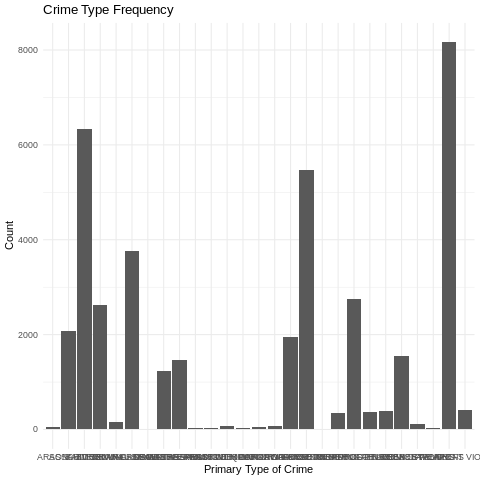

In [58]:
%%R
library(ggplot2)

# Bar chart of Primary Type of crime
ggplot(crime_data, aes(x = `Primary.Type`)) +
    geom_bar() +
    ggtitle("Crime Type Frequency") +
    xlab("Primary Type of Crime") +
    ylab("Count") +
    theme_minimal()


**Observation : This chart shows the frequency of different crime types. You can see which crimes are most common.**

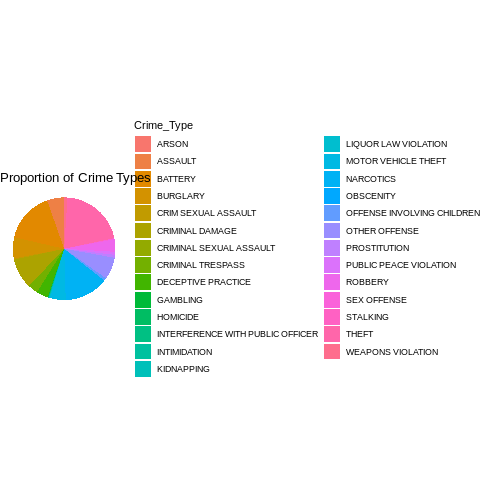

In [33]:
%%R
library(ggplot2)

# Prepare data for the pie chart by counting the occurrences of each crime type
crime_count <- as.data.frame(table(crime_data$`Primary.Type`))
colnames(crime_count) <- c("Crime_Type", "Count")

# Create a pie chart
ggplot(crime_count, aes(x = "", y = Count, fill = Crime_Type)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y", start = 0) +
    ggtitle("Proportion of Crime Types") +
    theme_void() +
    theme(legend.position = "right")



**Observation : This chart shows the proportion of each crime type relative to the total number of crimes.**

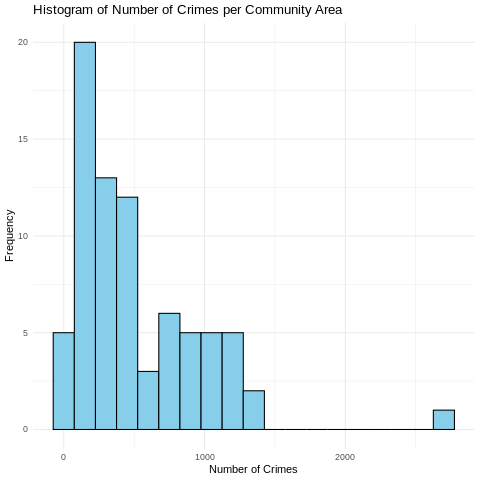

In [43]:
%%R
library(ggplot2)
library(dplyr)

# Count crimes per Community.Area
crime_area_count <- crime_data %>%
  group_by(Community.Area) %>%
  summarize(Count = n())

# Create histogram
ggplot(crime_area_count, aes(x = Count)) +
  geom_histogram(binwidth = 150, fill = "skyblue", color = "black") +
  labs(x = "Number of Crimes", y = "Frequency", title = "Histogram of Number of Crimes per Community Area") +
  theme_minimal()


**Observation : Histogram of Number of Crimes per Community Area**

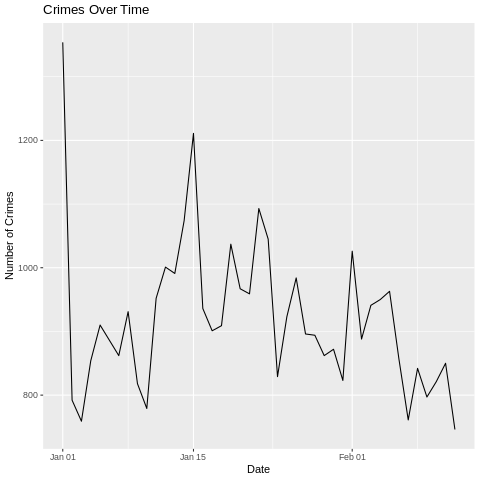

In [47]:
%%R
# Timeline of crimes over time
crime_data$Date <- as.Date(crime_data$Date, format="%m/%d/%Y %I:%M:%S %p")
ggplot(crime_data, aes(x = Date)) +
  geom_line(stat = "count") +
  labs(title = "Crimes Over Time", x = "Date", y = "Number of Crimes")


**Observation : This timeline chart reveals trends in crime over time, showing periods of higher or lower crime rates.**

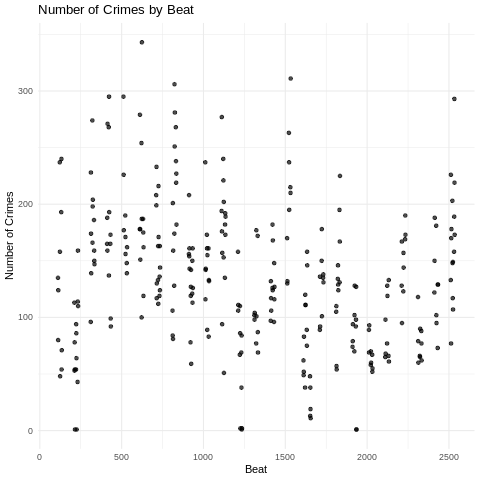

In [52]:
%%R
# Crime counts by beat
library(dplyr)
crime_counts_by_beat <- crime_data %>% count(Beat)
# Scatter plot
ggplot(crime_counts_by_beat, aes(x = Beat, y = n)) +
  geom_point(alpha = 0.7) +
  labs(title = "Number of Crimes by Beat", x = "Beat", y = "Number of Crimes") +
  theme_minimal()


**Observation : This scatter plot helps identify which beats have higher crime counts. It can be useful for understanding crime distribution across different beats.**

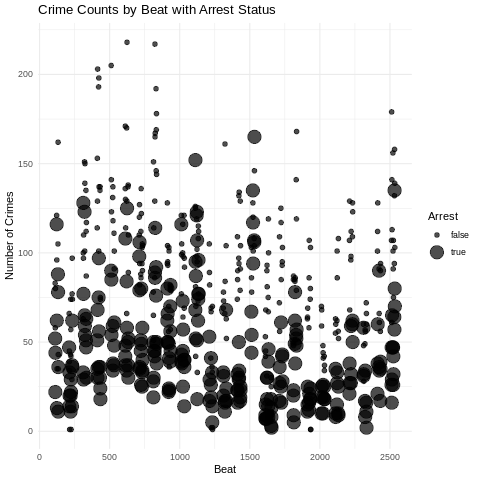

In [54]:
%%R
# Bubble plot of crime counts by beat with arrest status as bubble size
library(dplyr)
crime_by_beat_arrest <- crime_data %>%
  group_by(Beat, Arrest) %>%
  summarize(count = n(), .groups = 'drop')
# Convert Arrest to a factor for better visualization
crime_by_beat_arrest$Arrest <- as.factor(crime_by_beat_arrest$Arrest)
ggplot(crime_by_beat_arrest, aes(x = Beat, y = count, size = Arrest)) +
  geom_point(alpha = 0.7) +
  labs(title = "Crime Counts by Beat with Arrest Status",
       x = "Beat", y = "Number of Crimes", size = "Arrest") +
  theme_minimal()


**Observation : This bubble plot helps visualize how the number of crimes varies by beat and whether arrests are more frequent in certain beats.**